<a href="https://colab.research.google.com/github/amitay-sicherman/IML/blob/master/Lab_01_Basic_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Lab 01 - Sampling
# 
# This lab has three objectives:
#     1) Experience sampling different distributions, calculate PDF and CDF functions over sample sets and estimate 
#        different properties of our sample sets.
#     2) Get familiar with the jupyter notebook environment.
#     3) Get familiar with the ggplot library for plotting graphs
# 
# 
# We begin with sampling data from a normal (gaussian) distribution. As you already know this distribution is
# characterized by two parameters: the mean and the standard deviation (mu and sigma).

import numpy as np
import pandas as pd
from pandas import DataFrame
from plotnine import *


The mean and sd estimators over 10 samples drawn from a standard normal distribution were: mu=0.07, sigma=0.96


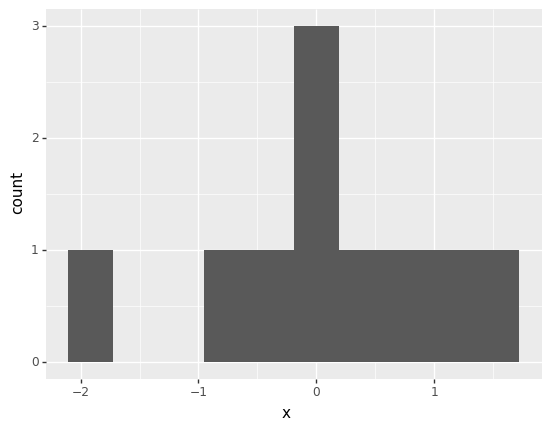

<ggplot: (200430293999)>

In [0]:
np.random.seed(7)

# This is also called standard normal
df = DataFrame({'x':np.random.normal(loc=0, scale=1, size=10)})
print("The mean and sd estimators over 10 samples drawn from a standard normal " +
      "distribution were: mu={}, sigma={}".format(round(df['x'].mean(),2), round(df['x'].std(),2)))
ggplot(df) + aes(x='x') + geom_histogram(bins=10)




s=100, mu=0.017, distance from real=0.000284
s=1000, mu=-0.039, distance from real=0.00154
s=10000, mu=-0.007, distance from real=4.3e-05
s=100000, mu=-0.002, distance from real=5e-06


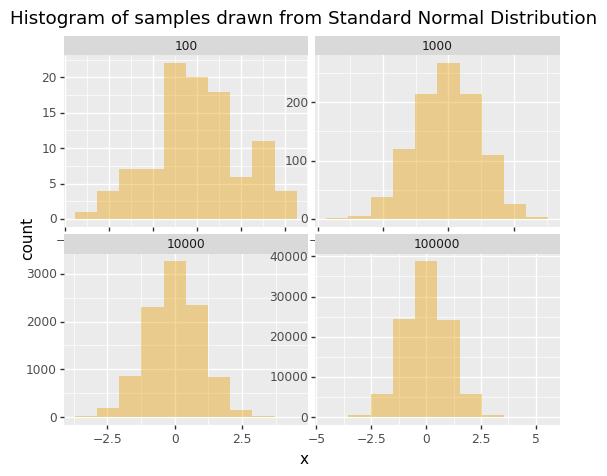

<ggplot: (-9223371836424481841)>

In [0]:
sizes, mu = [int(10e1), int(10e2), int(10e3), int(10e4)], 0
df = pd.concat([DataFrame({'x':np.random.normal(loc=mu, scale=1, size=s), 
                           'g':np.repeat(s, s)}) for s in sizes])
p = ggplot(df) + aes(x='x') + geom_histogram(bins=10, fill="#E69F00", alpha=.4) + \
    facet_wrap('~g', scales="free") + \
    ggtitle("Histogram of samples drawn from Standard Normal Distribution")

for s in sizes:
    print("s={}, mu={}, distance from real={}"
          .format(s,round(df.loc[df.g == s,"x"].mean(),3), round((df.loc[df.g == s,"x"].mean()-mu)**2, 6)))
p

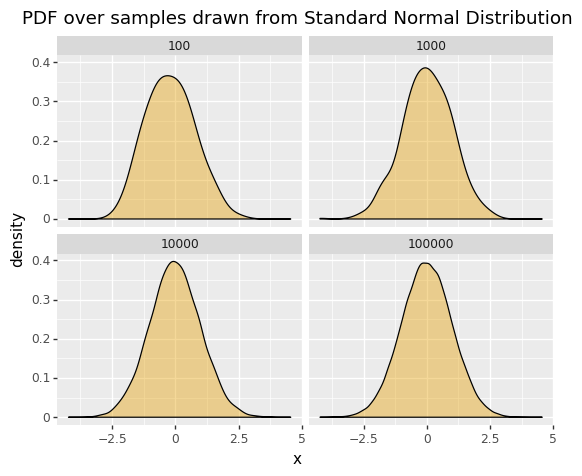

<ggplot: (-9223363263067241528)>

In [13]:
sizes, mu = [int(10e1), int(10e2), int(10e3), int(10e4)], 0
df = pd.concat([DataFrame({'x':np.random.normal(loc=mu, scale=1, size=s), 
                           'g':np.repeat(s, s)}) for s in sizes])
ggplot(df) + aes(x='x') + geom_density(fill="#E69F00", alpha=.4) + facet_wrap('~g') + \
    ggtitle("PDF over samples drawn from Standard Normal Distribution")


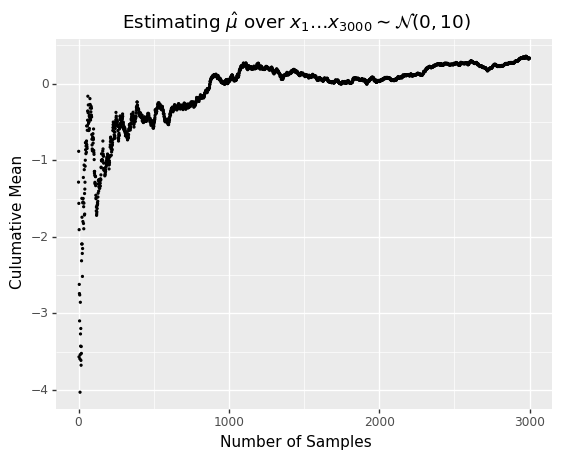

<ggplot: (-9223371836422436159)>

In [0]:
mu, sigma, n = 0, 10, 3000
x = np.random.normal(mu, sigma, n)
cumulative_mean = x.cumsum()/np.arange(1,n+1)
ggplot(DataFrame({'x':range(n), 'y':cumulative_mean})) + \
    geom_point(aes(x='x', y='y'), size=0.3) + \
    labs(x="Number of Samples", y="Culumative Mean") + \
    ggtitle(r"Estimating $\hat{{\mu}}$ over $x_1\ldots x_{{{0}}}\sim\mathcal{{N}}\left( {1},{2} \right)$".format(n, mu, sigma))


             x
0     0.007239
1     0.007837
2     0.006152
3     0.005177
4     0.006164
...        ...
2993  0.010148
2994  0.010149
2995  0.010146
2996  0.010146
2997  0.010145

[2998 rows x 1 columns]


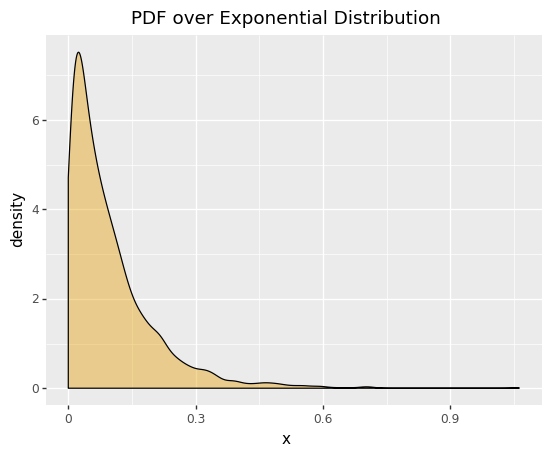

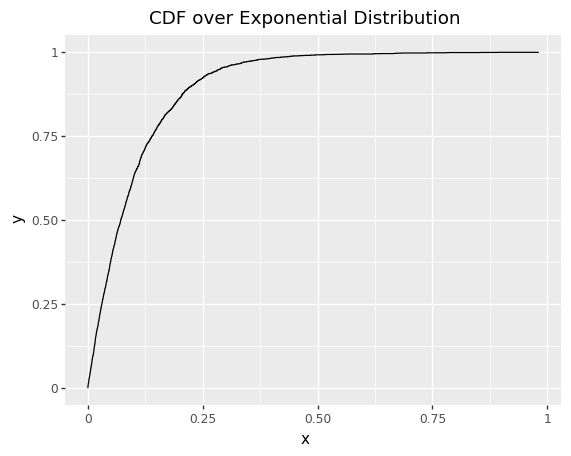

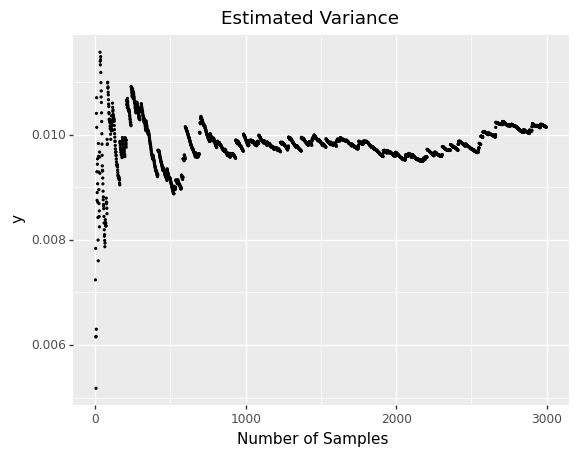

[<ggplot: (8773786954209)>,
 <ggplot: (8773787511935)>,
 <ggplot: (-9223363263067494126)>]

In [35]:
def exp_pdf(lam, n):
    """
    Plot the PDF of n samples drawn from the exponential distribution.
    :param lam: The exponent's parameter
    :param n: Number of samples
    :return: ggplot object
    """
    df =DataFrame({'x':np.random.exponential(scale=lam,size=n)}) 
    g=ggplot(df) + aes(x='x') + geom_density(fill="#E69F00", alpha=.4) +  ggtitle("PDF over Exponential Distribution")
    return g

def exp_cdf(lam, n):
    """
    Plot the CDF of n samples drawn from the exponential distribution.
    Hint: check the stat_ecdf function.
    :param lam: The exponent's parameter
    :param n: Number of samples
    :return: ggplot object
    """
    df =DataFrame({'x':np.random.exponential(scale=lam,size=n)}) 
    g=ggplot(df) + aes(x='x') +  stat_ecdf(geom = "step") +  ggtitle("CDF over Exponential Distribution")
    return g

def estimate_var(lam, n):
    """
    Plot the estimated variance for all 1<m<=n. 
    Hint: the variance estimator is calculated as: (1/(m-1))(sum i=1 to m ((x_i - E(x_1,...,x_m))**2))
    Hint 2: What should be the variance for exp(lam)? Did you get the same?
    :param lam: The exponent's parameter
    :param n: Number of samples
    :return: ggplot object 
    """
    x=np.random.exponential(scale=lam,size=n) 
    df2=DataFrame(columns=['x'])
    for m in range(2,n): 
        # c=0
        # for i in range(0,m):
        #   c+=x[i]-np.mean(x[1:m])**2
        df2=df2.append({'x':np.var(x[0:m])},ignore_index=True)
    g=ggplot(DataFrame({'x':range(2,n), 'y':df2['x']})) + \
    geom_point(aes(x='x', y='y'), size=0.3) + \
    labs(x="Number of Samples") + \
    ggtitle(r"Estimated Variance ")
    return g

[exp_pdf(.1,3000), exp_cdf(.1,3000), estimate_var(.1 ,3000)]